In [383]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [384]:
data=pd.read_csv('/content/gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


**EDA**

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


here we can get an idea of the number of data points and also their return type.

In [386]:
data['output']=data['TEY']
data.drop(['TEY'],axis=1,inplace=True)
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,output
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


**Visulization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


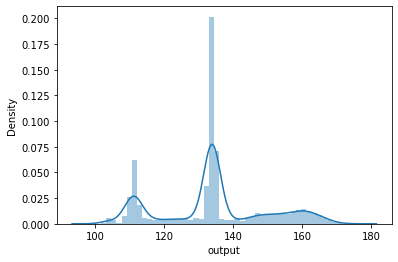

In [387]:
sns.distplot(data['output'])

From this plot we can infer that the average power received from the gas turbin lies between 120-160

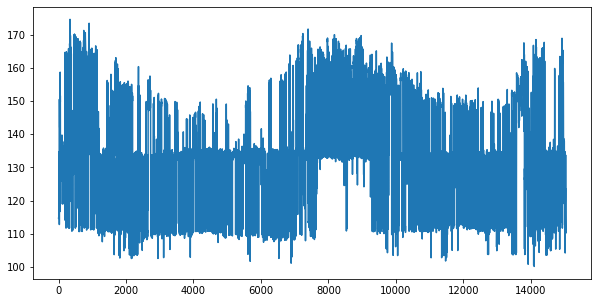

In [388]:
plt.figure(figsize=(10,5))
plt.plot(data['output'])

**Distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

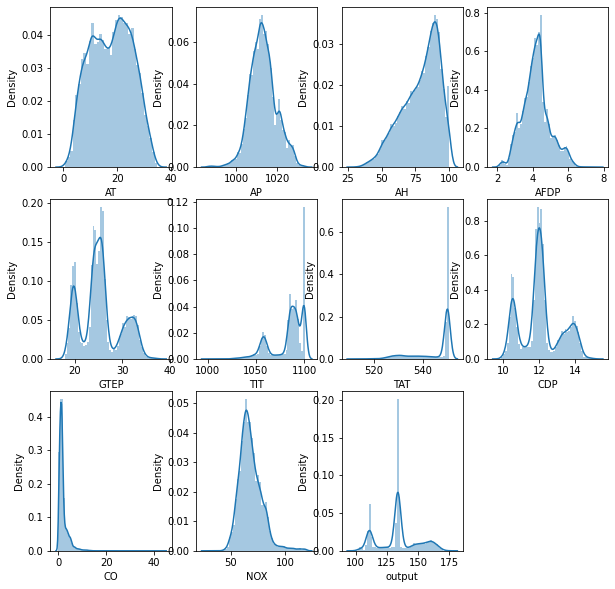

In [389]:
name=data.columns
plt.figure(figsize=(10,10))
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.distplot(data[name[i]])

This plot helps to find where the majority of the data lies for different features of the dataset.And also their skewness and other patterns

**Missing values**

In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  output  15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [391]:
data.isnull().sum()

AT        0
AP        0
AH        0
AFDP      0
GTEP      0
TIT       0
TAT       0
CDP       0
CO        0
NOX       0
output    0
dtype: int64

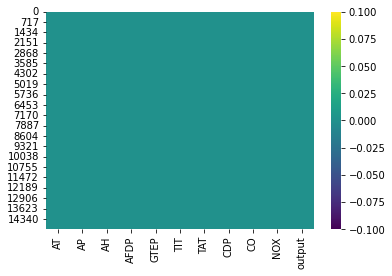

In [392]:
sns.heatmap(data.isnull(),cmap='viridis')

From this we can infer that there is no missing values in the dataset

**Duplicate Values**

In [393]:
data.duplicated().sum()

0

There is no duplpicate values in the dataset

**Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

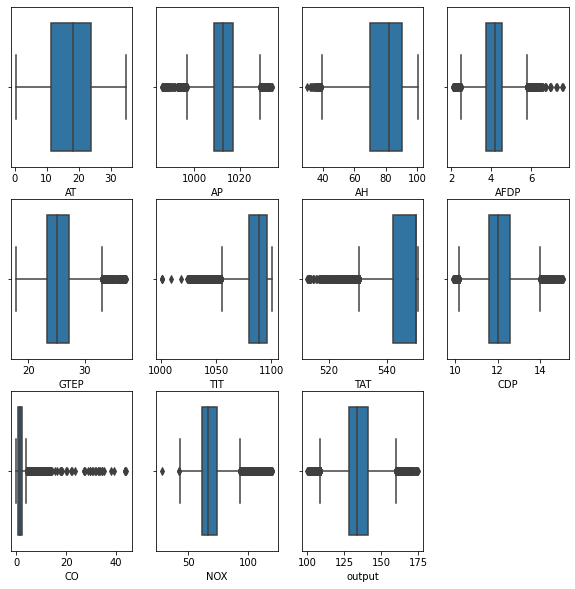

In [394]:
plt.figure(figsize=(10,10))
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.boxplot(data[name[i]])

We can infer that there are some outlier in the data set,but here we are dealing with outputs from sensor so we will be keeping the outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

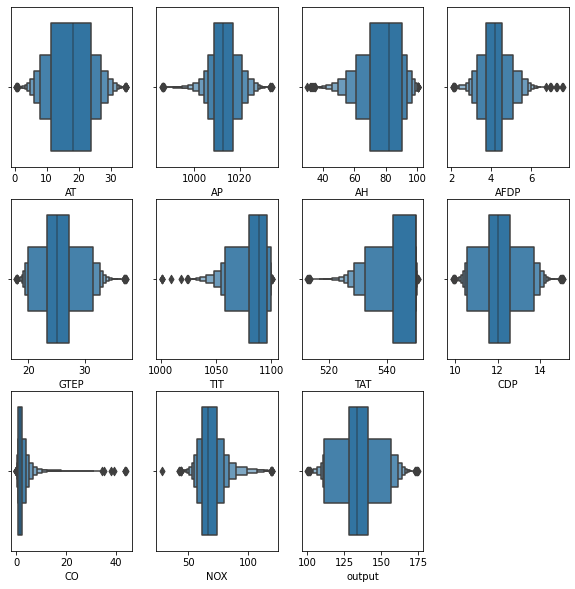

In [395]:
plt.figure(figsize=(10,10))
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.boxenplot(data[name[i]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

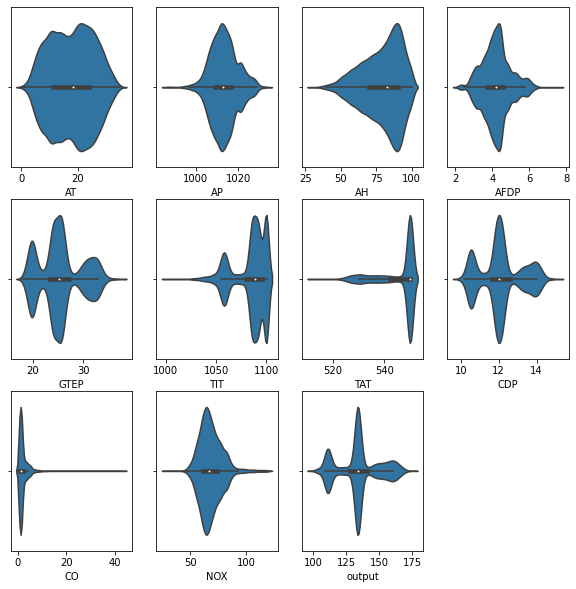

In [396]:
plt.figure(figsize=(10,10))
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.violinplot(data[name[i]])

In [397]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,output
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934,134.188464
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586,15.829717
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000,100.170000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500,127.985000
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000,133.780000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500,140.895000
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000,174.610000


Based on the inference of the above table feature scaling is good to be performed

**Pair plot**

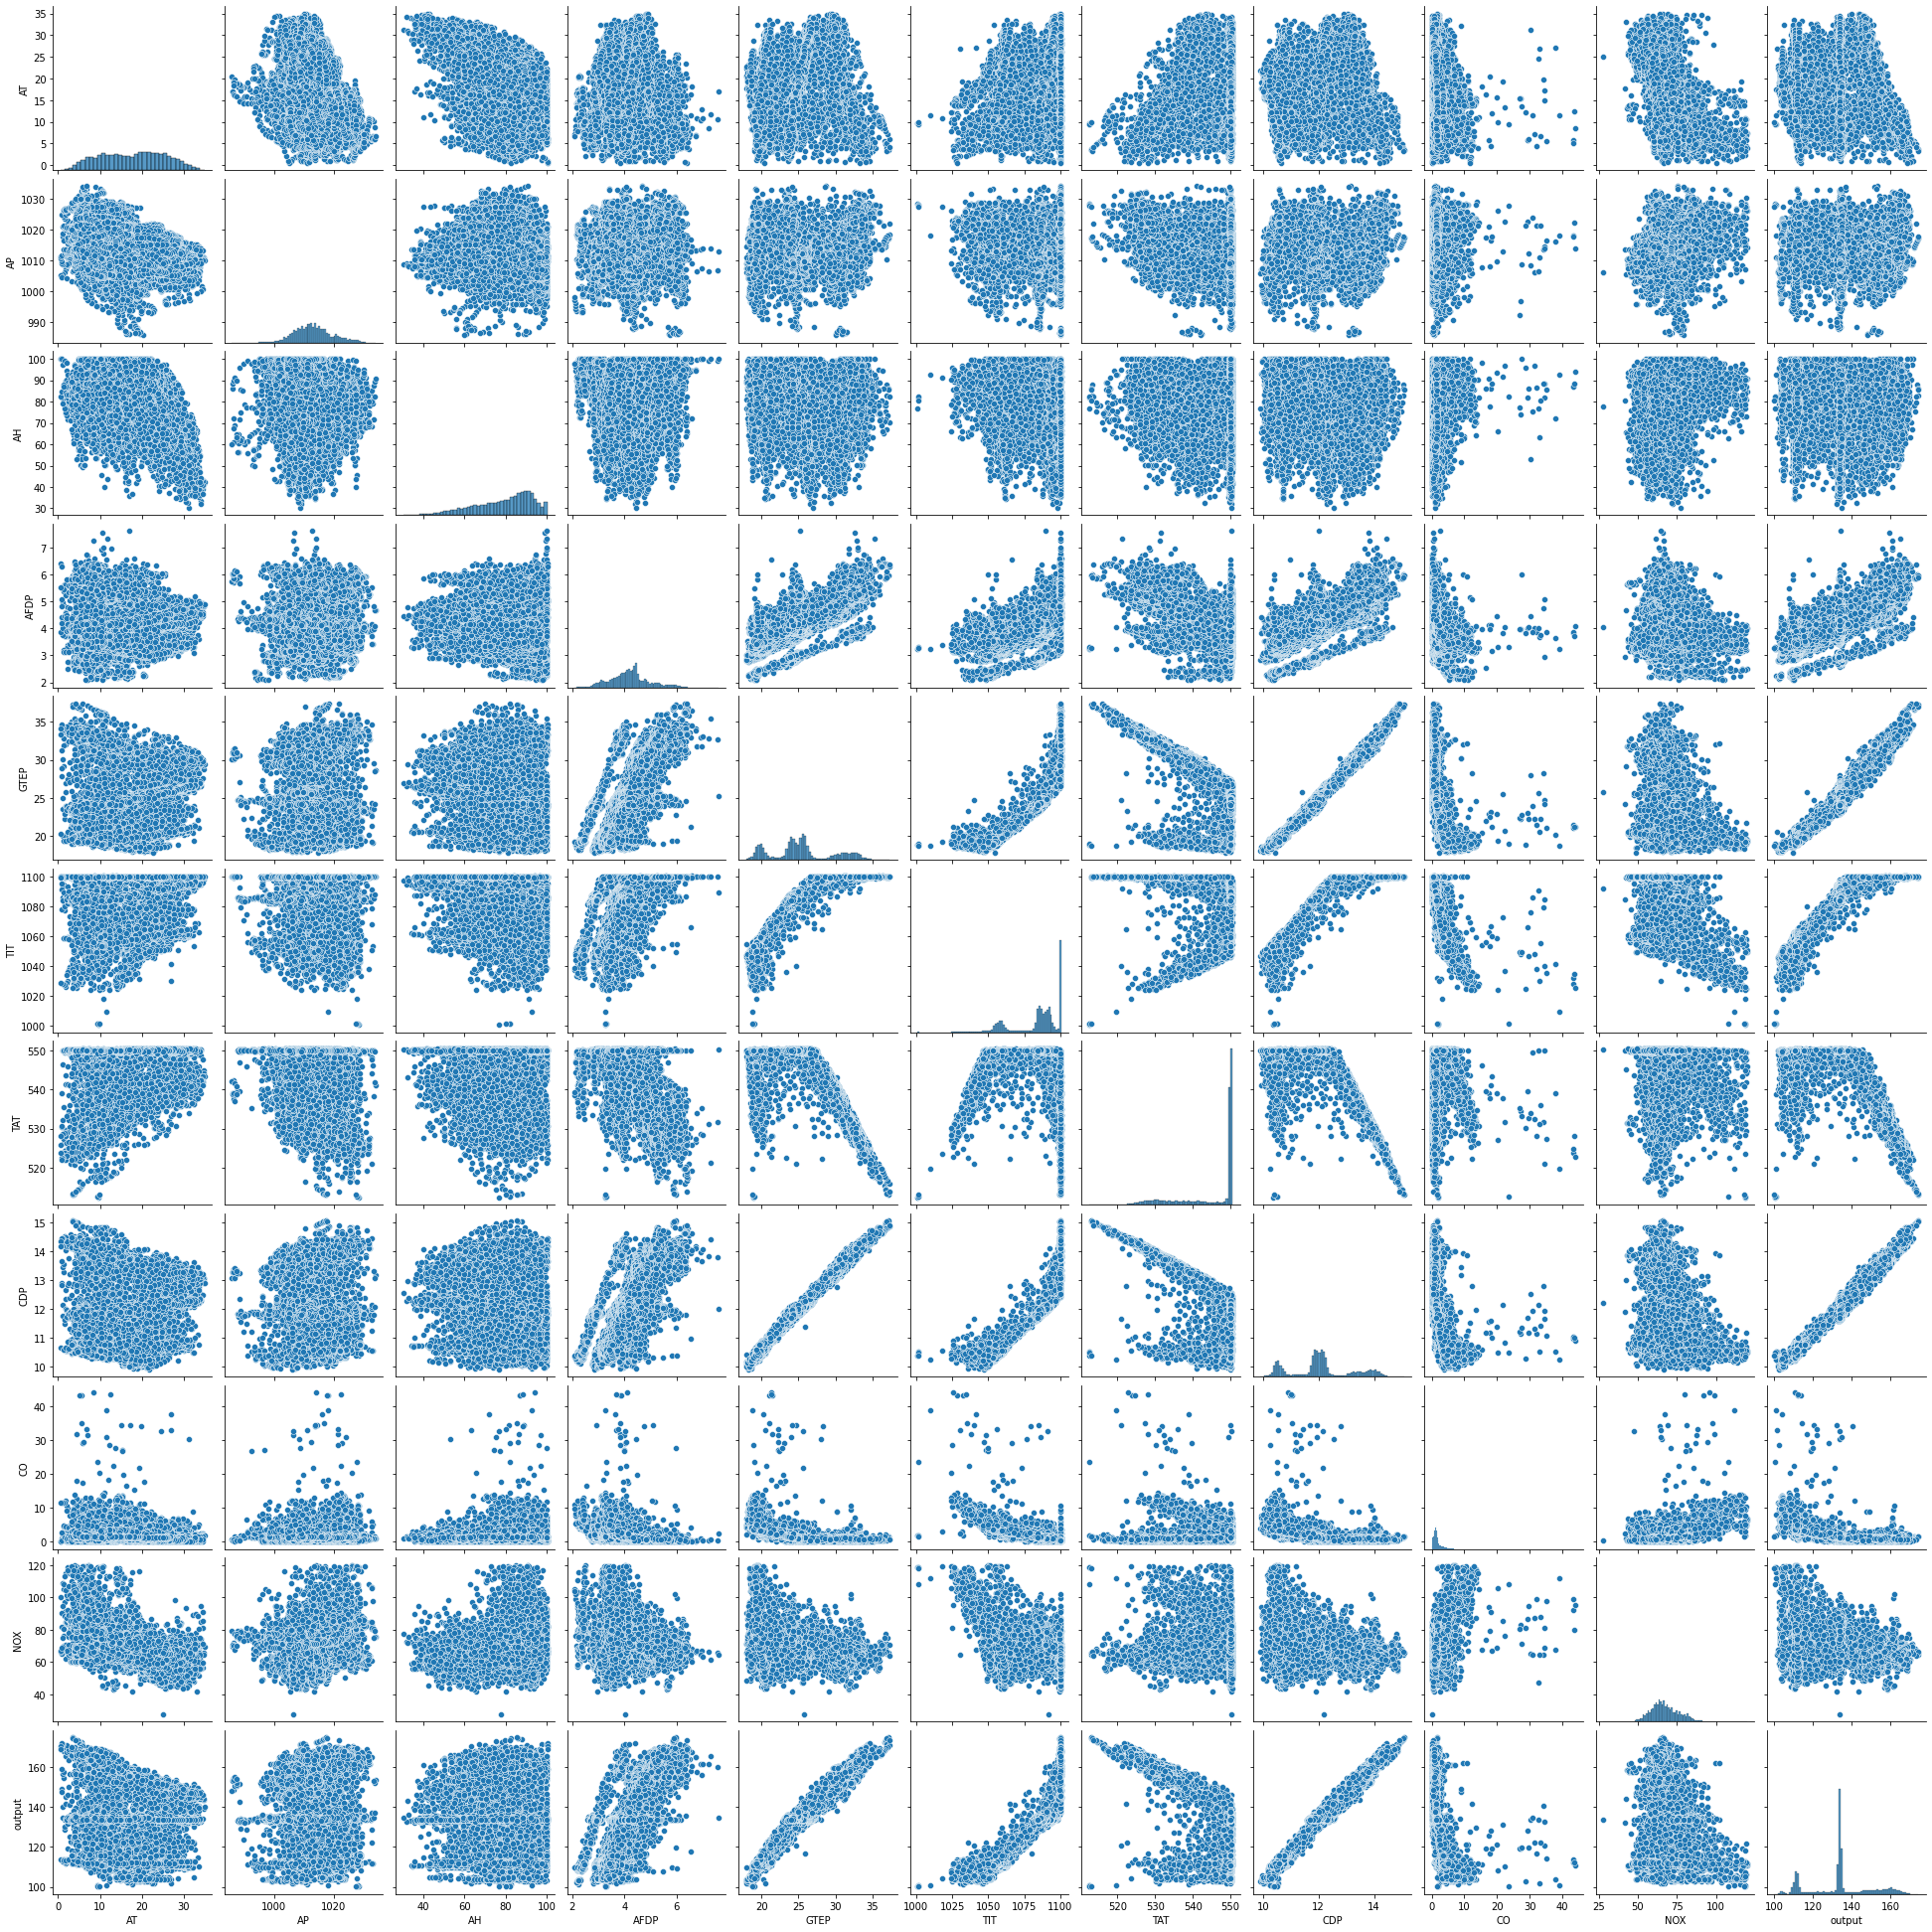

In [398]:
sns.pairplot(data)

**Correlation**

In [399]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,output
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


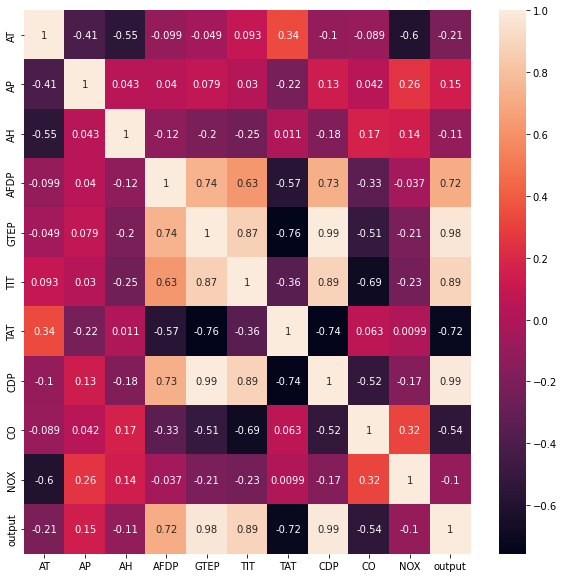

In [400]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

This helps us to get an idea about the correlation of features with the target variable and also the multi colinearity among other features

**Now we have the data in clean format**

**Selecting the independent and dependent variables**

In [401]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [402]:
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [403]:
y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

In [404]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

**Building the model**

**Splitting the data to training and testing**

In [405]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

First let us create a linear model using linear regression to get a refference point

**Linear regression**

In [406]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_pred,y_test))

0.507882598557204


**Using linear model we are getting a mean absolute error of .507-which will be our reference point**

In [407]:
linear_df=pd.DataFrame()
linear_df['Predicted']=y_pred
linear_df['actual']=y_test
linear_df['error']=y_pred-y_test
linear_df

,Predicted,actual,error
0,133.598048,134.06,-0.461952
1,157.042897,155.98,1.062897
2,134.418530,133.77,0.648530
3,134.641337,134.02,0.621337
4,133.436906,134.14,-0.703094
...,...,...,...
4507,133.817240,133.65,0.167240
4508,135.879149,133.98,1.899149
4509,133.612054,133.89,-0.277946
4510,153.189259,154.30,-1.110741


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


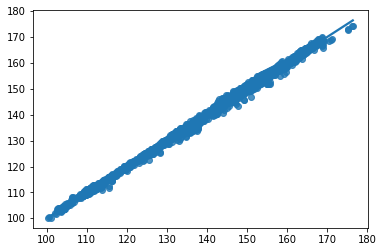

In [408]:
sns.regplot(y_pred,y_test)

This is our regression line for the linear model

In [409]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow

In [410]:
model1=Sequential()
model1.add(Dense(10,activation='sigmoid'))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(1,activation='linear'))            #the activation should be linear
model1.compile(loss='mse',metrics=['mae','mse'])

In [411]:
history=model1.fit(X,y,validation_split=.3,epochs=100,batch_size=40)
score=model1.evaluate(X,y)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 18221.0645 - mae: 134.0685 - mse: 18221.0645 - val_loss: 16736.0859 - val_mae: 128.5444 - val_mse: 16736.0859
Epoch 2/100
264/264 [==============================] - 0s 2ms/step - loss: 16939.9668 - mae: 129.2973 - mse: 16939.9668 - val_loss: 15285.0918 - val_mae: 122.9088 - val_mse: 15285.0918
Epoch 3/100
264/264 [==============================] - 0s 2ms/step - loss: 14747.0996 - mae: 120.6671 - mse: 14747.0996 - val_loss: 13054.8779 - val_mae: 113.6796 - val_mse: 13054.8789
Epoch 4/100
264/264 [==============================] - 0s 2ms/step - loss: 11746.3311 - mae: 107.6601 - mse: 11746.3311 - val_loss: 10123.7529 - val_mae: 100.1565 - val_mse: 10123.7529
Epoch 5/100
264/264 [==============================] - 0s 2ms/step - loss: 8246.4170 - mae: 89.9862 - mse: 8246.4170 - val_loss: 6723.6597 - val_mae: 81.5066 - val_mse: 6723.6597
Epoch 6/100
264/264 [==============================] - 0s 2ms/step - loss: 4688.4

In [412]:
print(score)

[0.6701838970184326, 0.6002141833305359, 0.6701838970184326]


In [413]:
model1.summary()

Model: "sequential_847"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1674 (Dense)          (None, 10)                110       
                                                                 
 dense_1675 (Dense)          (None, 6)                 66        
                                                                 
 dense_1676 (Dense)          (None, 1)                 7         
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [414]:
hist=pd.DataFrame(history.history)
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,18221.064453,134.068451,18221.064453,16736.085938,128.544418,16736.085938
1,16939.966797,129.297348,16939.966797,15285.091797,122.908798,15285.091797
2,14747.099609,120.667061,14747.099609,13054.877930,113.679626,13054.878906
3,11746.331055,107.660088,11746.331055,10123.752930,100.156532,10123.752930
4,8246.416992,89.986229,8246.416992,6723.659668,81.506554,6723.659668
...,...,...,...,...,...,...
95,0.462447,0.496084,0.462447,0.547006,0.532389,0.547006
96,0.461091,0.498672,0.461091,0.516209,0.523091,0.516209
97,0.461298,0.496350,0.461298,0.718011,0.624905,0.718011
98,0.460058,0.496141,0.460058,0.503706,0.491886,0.503706


**The mean absolute error of this model is less than our Linear model but only by .001 units**

**Prediction**

In [415]:
y_pred=model1.predict(X_test)

In [416]:
y_pred

array([[133.84297],
       [157.99277],
       [134.36583],
       ...,
       [134.13055],
       [154.19795],
       [133.84637]], dtype=float32)

In [417]:
#Converting 2d array to 1 d list
import itertools
k=list(itertools.chain.from_iterable(y_pred))

In [418]:
linear_df1=pd.DataFrame()
linear_df1['Predicted']=k
linear_df1['actual']=y_test
linear_df1['error']=k-y_test
linear_df1

,Predicted,actual,error
0,133.842972,134.06,-0.217028
1,157.992767,155.98,2.012767
2,134.365829,133.77,0.595829
3,134.840454,134.02,0.820454
4,133.310867,134.14,-0.829133
...,...,...,...
4507,133.892258,133.65,0.242258
4508,136.183212,133.98,2.203212
4509,134.130554,133.89,0.240554
4510,154.197952,154.30,-0.102048


The mean absolute error for both testing and training data set almost equal and also significantly low

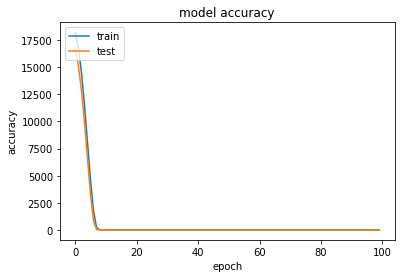

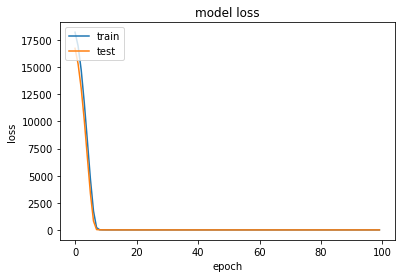

In [419]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


The model is too simple for the algorithm as it minmized the loss with less than 20 epoch

**Let us now use hyper parametric tuning to select the best parameters**

**Best epoch and batch size**

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasRegressor
model=KerasRegressor(build_fn=model_sel,verbose=0)
epochs=[10,15,30]
batch_size=[10,20,40]
search=dict(epochs=epochs,batch_size=batch_size)
grid = GridSearchCV(estimator = model,param_grid = search,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.807 total time=  11.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.788 total time=  10.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.648 total time=  10.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

In [ ]:
def model_sel():
  model2=Sequential()
  model2.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model2.add(Dense(10,kernel_initializer='uniform',activation='relu'))
  model2.add(Dense(1,activation='linear'))
  #adam=Adam(lr=0.01)
  model2.compile(loss='mse',metrics=['mae'])
  return model2

**Let us search for the best drop out rate and learning rate**

In [ ]:
from keras.layers import Dropout
def model_create(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='linear'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
  return model

In [ ]:
drop_rate=[0.0,0.1,0.2]
learning_rate=[0.001,0.01,0.1]
#creating the model
model=KerasRegressor(build_fn=model_create)
par=dict(dropout_rate=drop_rate,learning_rate=learning_rate)
grid=GridSearchCV(estimator=model,param_grid=par,cv=KFold(),verbose=5)
grid_result=grid.fit(X,y)

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

**Let us now change the activation function**

In [ ]:
def model_create2(active,neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,kernel_initializer='uniform',activation=active))
 # model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation=active))
  #model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='linear'))
  #adam=Adam(lr=.1)
  model.compile(loss='mse',metrics=['mse','mae'])
  return model

In [ ]:
active=['relu','tanh','linear','softmax']
neuron1=[2,4,8,10]
neuron2=[3,6,10,12]
par=dict(active=active,neuron1=neuron1,neuron2=neuron2)
model3=KerasRegressor(build_fn=model_create2)
grid=GridSearchCV(estimator=model3,param_grid=par,cv=KFold(),verbose=5)
grid_result=grid.fit(X,y)

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

In [ ]:
model5=Sequential()
model5.add(Dense(10,activation='relu'))
model5.add(Dense(10,activation='relu'))
model5.add(Dense(1,activation='linear'))            #the activation should be linear
model5.compile(loss='mse',metrics=['mae','mse'])

In [ ]:
hist=model5.fit(X,y,validation_split=.25,batch_size=20,epochs=30)

In [ ]:
hist=pd.DataFrame(history.history)
hist

The mse of this model is High compared to initial model which has the least mean absolute error of.504

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model5.predict(X_test)

In [ ]:
y_pred=list(itertools.chain.from_iterable(y_pred))

In [ ]:
result_df=pd.DataFrame()
result_df['actual']=y_test
result_df['Predicted']=y_pred
result_df['error']=y_pred-y_test
result_df


In [ ]:
sns.regplot(y_pred,y_test)